In [4]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# $$\text{Quiz 4}$$

$\text{Exercise 1}$

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of \eqref{eul2} using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [5]:
import numpy as np

def EulerMethod(a,b,c,N,f):
    H = (b-a)/N
    x = np.linspace(a,b,N+1)
    y1 = np.zeros([N+1])
    y1[a] = c
    for k in range(1,N+1):
        y1[k] = y1[k-1] + H*f(x[k-1],y1[k-1])
    
    return x,y1


2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}



In [2]:
import numpy as np

def RK2Method(a,b,c,N,f):
    H = (b-a)/N
    x = np.linspace(a,b,N+1)
    y2 = np.zeros([N+1])
    y2[a] = c
    
    
    for k in range(1,N+1):
        α = f(x[k-1],y2[k-1])
        y2[k] = y2[k-1] + H*f(x[k-1] + H/2,y2[k-1] + (H/2)*α)
    
    return x,y2


3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with <b> EulerMethod </b> and <b> RK2Method </b>

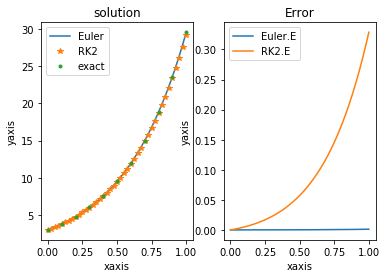

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 1
c = 3
N = 200
f = lambda x,y1:2*y1 + np.exp(2*x)

g = lambda x: (x+3)*np.exp(2*x)

x,y1 = RK2Method(a,b,c,N,f)
x,y2 = EulerMethod(a,b,c,N,f)

y = g(x)
e1 = abs(y1-y)
e2 = abs(y2-y)

plt.subplot(1,2,1)
plt.plot(x,y1)
plt.plot(x[::5],y2[::5],'*')
plt.plot(x[::20],y[::20],'.')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.title('solution')
plt.legend(['Euler','RK2','exact'])

plt.subplot(1,2,2)
plt.plot(x,e1)
plt.plot(x,e2)
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.title('Error')
plt.legend(['Euler.E','RK2.E'])




$\text{Exercise 2}$

1. write a python code to solve the following linear equations


\begin{equation}
  \begin{cases}
    x+y+z+w  = 13\\
    2x+3y-w = -1\\
    -3x+4y+z+2w  = 10\\
    x+2y-z+w = 1
  \end{cases}.
\end{equation}


In [52]:
import numpy as np
A = np.array([[1,1,1,1],[2,3,0,-1],[-3,4,1,2],[1,2,-1,1]])
b = np.array([13,-1,10,1])
np.linalg.solve(A,b)

array([2., 0., 6., 5.])

2. write a python code to solve the following nonlinear equations
\begin{equation}
\begin{cases}
    x^2 + y + x = 2\\
    2e^x + 3y = 8
\end{cases}
\end{equation}

In [53]:
import numpy as np
from scipy.optimize import fsolve

def nonlinear(R):
    x,y=R
    
    return(x**2 + y + x - 2,2*np.exp(x) + 3*y - 8)
fsolve(nonlinear,(1,1))

array([-3.50235259e-12,  2.00000000e+00])